In [1]:
# Ignoring unnecessory warnings
import warnings
warnings.filterwarnings("ignore")  
# Specialized container datatypes
import collections
# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For large and multi-dimensional arrays
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Natural language processing library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
# For basic cleaning and data preprocessing 
import re
import string 
# Machine learning libary
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# For wordcloud generating 
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/linux-
[nltk_data]     notebook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = 'spam.csv'
df = pd.read_csv(data, encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
df.rename(columns = {'v1':'label','v2':'message'}, inplace=True)
df.dropna(inplace=True)


In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


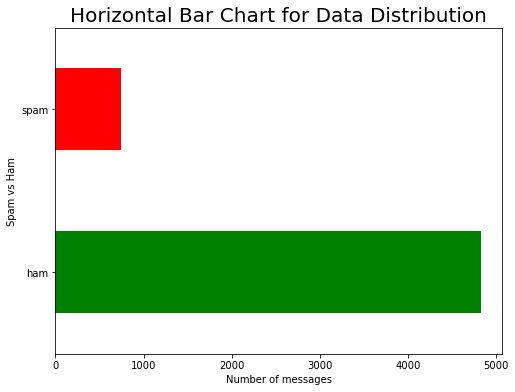

In [7]:
df['label'].value_counts().plot(kind = 'barh', color = ['green','red'], figsize = (8, 6))
plt.title('Horizontal Bar Chart for Data Distribution', fontsize = 20)
plt.ylabel('Spam vs Ham')
plt.xlabel('Number of messages')
plt.show()

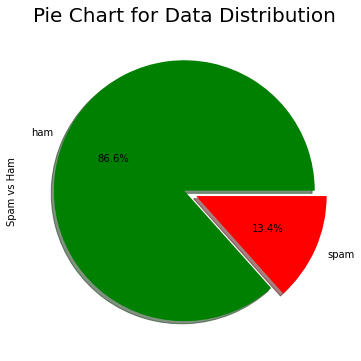

In [8]:
df['label'].value_counts().plot(kind = 'pie', colors = ['green','red'], explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.title('Pie Chart for Data Distribution', fontsize = 20)
plt.ylabel('Spam vs Ham')
plt.show()



In [9]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
df.loc[df['label'] == 'ham'].sample()


,label,message
5412,ham,Gr8. So how do you handle the victoria island ...


In [11]:
df.loc[df['label'] == 'spam'].sample()


,label,message
295,spam,T-Mobile customer you may now claim your FREE ...


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

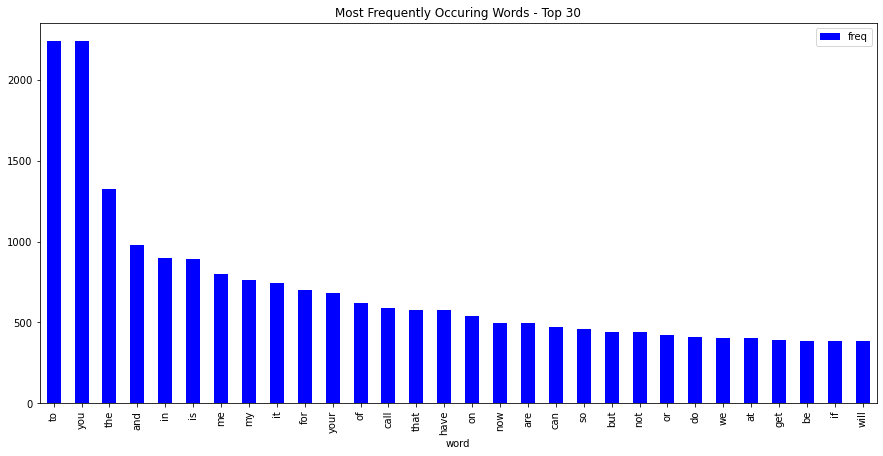

In [12]:
cv = CountVectorizer()
words = cv.fit_transform(df.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [13]:
def getWords(label):
    temp_words = ' '.join(list(df.loc[df['label'] == label]['message'])) 
    lst_words = []
    words = [word.lower() for word in word_tokenize(temp_words) 
             if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    lst_words = lst_words + words
    return lst_words


In [14]:
# Get both spam and ham words
spam_words = getWords('spam')
ham_words = getWords('ham')


In [15]:
def generate_wordcloud(words):
    # exclude stop words 
    wordcloud = WordCloud(max_words=1000,width=840, height=540).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

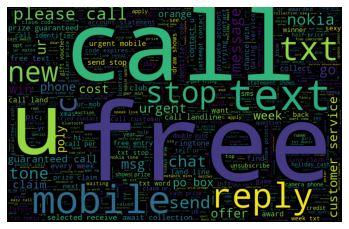

In [16]:
# generate wordcloud for 'spam' sms
generate_wordcloud(' '.join(spam_words))

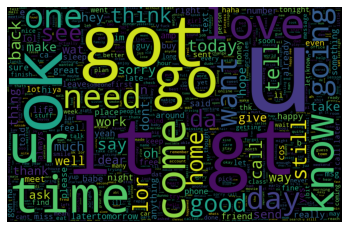

In [17]:
# generate wordcloud for 'ham' sms
generate_wordcloud(' '.join(ham_words))


In [ ]:
# 20 most frequent spam words
Counter = collections.Counter(spam_words)
most_occur_spam_words = Counter.most_common(20)
df_most_occur_spam_words = pd.DataFrame(most_occur_spam_words, columns=['word','frequency'])
df_most_occur_spam_words


In [ ]:
df_most_occur_spam_words.plot(x='word', y='frequency', kind='bar', figsize=(15, 7), color = 'red')

In [ ]:
# 20 most frequent ham words
Counter = collections.Counter(ham_words)
most_occur_ham_words = Counter.most_common(20)
df_most_occur_ham_words = pd.DataFrame(most_occur_ham_words, columns=['word','frequency'])
df_most_occur_ham_words

In [ ]:
df_most_occur_ham_words.plot(x='word', y='frequency', kind='bar', figsize=(15, 7), color = 'blue')


In [ ]:
# top 20 bigrams in spam_words
spam_bigrams = ngrams(spam_words, 2)
spam_bigrams_freq = collections.Counter(spam_bigrams)
most_freq_spam_bigrams = spam_bigrams_freq.most_common(20)
df_most_freq_spam_bigrams = pd.DataFrame(most_freq_spam_bigrams, columns=['bigram','frequency'])
df_most_freq_spam_bigrams

In [ ]:
df_most_freq_spam_bigrams.plot(x='bigram', y='frequency', kind='bar', figsize=(15, 7), color = 'red')


In [ ]:
# top 20 bigrams in ham_words
ham_bigrams = ngrams(ham_words, 2)
ham_bigrams_freq = collections.Counter(ham_bigrams)
most_freq_ham_bigrams = ham_bigrams_freq.most_common(20)
df_most_freq_ham_bigrams = pd.DataFrame(most_freq_ham_bigrams, columns=['bigram','frequency'])
df_most_freq_ham_bigrams

In [ ]:
df_most_freq_ham_bigrams.plot(x='bigram', y='frequency', kind='bar', figsize=(15, 7), color = 'blue')

In [ ]:
def preprocess_text(text):
    # remove all punctuation
    text = re.sub(r'[^\w\d\s]', ' ', text)
    # collapse all white spaces
    text = re.sub(r'\s+', ' ', text)
    # convert to lower case
    text = re.sub(r'^\s+|\s+?$', '', text.lower())
    # remove stop words and perform stemming
    stop_words = nltk.corpus.stopwords.words('english')
    lemmatizer = WordNetLemmatizer() 
    return ' '.join(
        lemmatizer.lemmatize(term) 
        for term in text.split()
        if term not in set(stop_words)
    )
    

In [ ]:
df['processed_text'] = df.message.apply(lambda row : preprocess_text(row))
df.head()


In [ ]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 2)).fit_transform(df.processed_text)
tfidf_data = pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

In [ ]:
df['message_length'] = df.message.apply(lambda row : len(row))
df.head()

In [ ]:
sns.violinplot(df['message_length'], df['label'])
plt.title('Distribution of message length')
plt.show()

In [ ]:
df.hist(column='message_length', by='label', bins=50, figsize=(12,4))


In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)), 3)*100


In [ ]:
df['punct%'] = df.message.apply(lambda row : count_punct(row))
df.head()


In [ ]:
sns.violinplot(df['punct%'], df['label'])
plt.title('Distribution of punctuation')
plt.show()

In [ ]:
df.hist(column='punct%', by='label', bins=50, figsize=(12,4))

In [ ]:
def count_https(text):
    http_regex = re.compile(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)')
    count = sum([1 for word in text.split() if http_regex.match(word)])
    return round(count/(len(text)), 3)*100

In [ ]:
df['httpaddr%'] = df.message.apply(lambda row : count_https(row))
df.head()


In [ ]:
sns.violinplot(df['httpaddr%'], df['label'])
plt.title('Distribution of https')
plt.show()

In [ ]:
df.hist(column='httpaddr%', by='label', bins=50, figsize=(12,4))

In [ ]:
def count_money_symb(text):
    money_symb = ['£','$','€']
    count = sum([1 for char in text if char in money_symb])
    return round(count/(len(text)), 3)*100


In [ ]:
df['money_symb%'] = df.message.apply(lambda row : count_money_symb(row))
df.head()


In [ ]:
sns.violinplot(df['money_symb%'], df['label'])
plt.title('Distribution of money symbols')
plt.show()

In [ ]:
df.hist(column='money_symb%', by='label', bins=50, figsize=(12,4))

In [ ]:
def count_phone_numbers(text):
    phone_regex = re.compile(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b')
    count = sum([1 for word in text.split() if phone_regex.match(word)])
    return round(count/(len(text)), 3)*100


In [ ]:
df['phone_numb%'] = df.message.apply(lambda row : count_phone_numbers(row))
df.head()


In [ ]:
sns.violinplot(df['phone_numb%'], df['label'])
plt.title('Distribution of phone numbers')
plt.show()


In [ ]:
df.hist(column='phone_numb%', by='label', bins=50, figsize=(12,4))


In [ ]:
def count_numbers(text):
    count = sum([1 for word in text.split() if word.isdigit()])
    return round(count/(len(text)), 3)*100


In [ ]:
df['numbers%'] = df.message.apply(lambda row : count_numbers(row))
df.head()


In [ ]:
sns.violinplot(df['numbers%'], df['label'])
plt.title('Distribution of numbers')
plt.show()


In [ ]:
df.hist(column='numbers%', by='label', bins=50, figsize=(12,4))

In [ ]:
df.hist(column='numbers%', by='label', bins=50, figsize=(12,4))

In [ ]:
final_data = pd.concat([df['money_symb%'], df['phone_numb%'], tfidf_data], axis=1)
final_data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data, df['label'], test_size=.2)

In [ ]:
clf = MultinomialNB(alpha=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))


In [ ]:
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred),3)))

In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[['actual', 'actual'], ['spam', 'ham']],
    columns=[['predicted', 'predicted'], ['spam', 'ham']]
)
